#Introduction to CNN and Computer Vision

Computer vision is the practice of writing algorithms that can discover patterns innvisual data. Such as the camera of a self-driving car recognizing the car infront

Get the data
The images being worked on are from Food101 dataset (101 different classes of food) from https://www.kaggle.com/datasets/dansbecker/food-101

However this modification is for pizza and steak.



In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-07-07 19:24:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   154MB/s    in 0.7s    

2023-07-07 19:24:53 (154 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



Inspect the data and become one with it.

A very crucial step is becoming one with data at the beginning of a machine learning project.

For computer vision it means visualizing multiple samples of your data

In [2]:
#list the files in the pizza_steak
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/test/

pizza  steak


In [4]:
!ls pizza_steak/train/steak


1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [2]:
import os
#Walkthrough the pizza_steak directory and list the number of files (function known as walk)
for dirpath,dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


One other method of checking how many images are in a file

In [6]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

In [7]:
num_steak_images_train

750

Visualizing our images programmatically

In [3]:
#Get the classnames
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names= np.array(sorted([item.name for item in data_dir.glob("*")])) #create a list of class_names from the subdirectories (in the train folder)
print(class_names)

['pizza' 'steak']


In [4]:
#Visualization of our data using matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class): #function that selects an image randomly from the path defined above and from the class that we get to define
  #setup the target directory, viewing of the images is done here
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1) #random module in python ( randomly sample 1 item in the target folder)
  print(random_image)
  # Read in the image and plot using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img) #function in matplotlib plt
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") #Print the shape because we want to know the data we are dealing with
  return img



['2361812.jpg']
Image shape: (512, 512, 3)


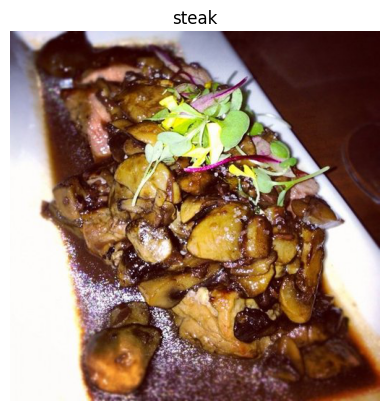

In [7]:
#view a random image from the training data set
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak") #When image is read by mpimg.imread it turns into a big array,tensors

In [8]:
#The images imported and plotted are big giant arrays/tensors of different pixel values of the color channels
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 77,  65,  79],
        [ 83,  70,  87],
        [ 86,  75,  92],
        ...,
        [ 39,   3,   5],
        [ 38,   2,   4],
        [ 38,   2,   4]],

       [[ 76,  64,  78],
        [ 81,  68,  85],
        [ 84,  73,  90],
        ...,
        [ 39,   3,   5],
        [ 38,   2,   4],
        [ 38,   2,   4]],

       [[ 76,  64,  78],
        [ 80,  67,  84],
        [ 81,  70,  87],
        ...,
        [ 39,   3,   5],
        [ 38,   2,   4],
        [ 38,   2,   4]],

       ...,

       [[253, 252, 250],
        [253, 252, 250],
        [253, 252, 250],
        ...,
        [174, 132,  72],
        [173, 132,  70],
        [175, 131,  70]],

       [[253, 252, 250],
        [253, 252, 250],
        [253, 252, 250],
        ...,
        [177, 132,  73],
        [176, 131,  72],
        [175, 131,  70]],

       [[253, 252, 250],
        [253, 252, 250],
        [253, 252, 250],
        ...,
        [178, 133,  7

In [13]:
#view image shape
img.shape #returns the width, height, color channels

(512, 382, 3)

Many machine models including neural networks prefer the values they work with to be between 0 and 1. One of the most common preprocessing steps for working with the images is scale/normalize the pixel values by dividing the image arrays by 255 as 255 is the max. pixel value.


In [14]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.58823529, 0.50196078, 0.64313725],
        [0.53333333, 0.45490196, 0.59215686],
        [0.44705882, 0.36862745, 0.51372549],
        ...,
        [0.03921569, 0.03137255, 0.17647059],
        [0.01176471, 0.00784314, 0.12941176],
        [0.01176471, 0.01176471, 0.12156863]],

       [[0.7372549 , 0.65882353, 0.79607843],
        [0.73333333, 0.65490196, 0.79215686],
        [0.71764706, 0.63921569, 0.78431373],
        ...,
        [0.03921569, 0.02352941, 0.16078431],
        [0.01960784, 0.00784314, 0.12941176],
        [0.02745098, 0.01568627, 0.12941176]],

       [[0.7372549 , 0.65882353, 0.79607843],
        [0.75294118, 0.6745098 , 0.81960784],
        [0.76862745, 0.68627451, 0.83921569],
        ...,
        [0.02745098, 0.01568627, 0.1372549 ],
        [0.01960784, 0.00784314, 0.12156863],
        [0.03529412, 0.02352941, 0.1372549 ]],

       ...,

       [[0.21960784, 0.19215686, 0.09019608],
        [0.18431373, 0.14509804, 0.04705882],
        [0.21176471, 0

AN END TO END EXAMPLE:
A convolutional neural network to find the patterns in our images, more specifically:
* Load our images
* Preprocess our images
* Build a CNN to find patterns
* Compile our CNN
* Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Set up data preprocessing (getting all pixel values between 0 & 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Set up path to our directory
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed= 42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32, #We define the batch size so that they can all fit into our memory processor
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
#Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)), #3 is the color channels
    tf.keras.layers.Conv2D(10,3, activation="relu"), #
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

#Compile our CNN
model_1.compile(loss="binary_crossentropy", #working with a binary problem
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 282ms/step - loss: 0.6155 - accuracy: 0.6247 - val_loss: 0.4490 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 11s 229ms/step - loss: 0.4575 - accuracy: 0.7833 - val_loss: 0.3521 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 13s 269ms/step - loss: 0.3900 - accuracy: 0.8333 - val_loss: 0.3460 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 13s 278ms/step - loss: 0.3482 - accuracy: 0.8513 - val_loss: 0.2987 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 12s 250ms/step - loss: 0.3142 - accuracy: 0.8727 - val_loss: 0.2856 - val_accuracy: 0.8980


In [15]:
#Get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Using the same model as before
Let us replicate the model that we have built in a previous section to see if it works with our image data
The model is from [TensorFlow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,2&seed=0.51754&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).





In [16]:
train_data

In [17]:
#Set a random seed
tf.random.set_seed(42)

#Create a model to replicate the Tensorflow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)), #Reshape the input shape to the values assigned
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 263ms/step - loss: 0.6938 - accuracy: 0.4707 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 256ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 13s 273ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 221ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [18]:
#Get the model Summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 gets to perform terribly with a very low accuracy level, We can improve it by adding layers as well as increasing the hidden units.

In [19]:
#Set the random seed for reproducible results.
tf.random.set_seed(42)

#Create a model like what we created above with a few additives
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 227ms/step - loss: 3.6080 - accuracy: 0.5993 - val_loss: 1.1282 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.6620 - accuracy: 0.7327 - val_loss: 0.5180 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 10s 222ms/step - loss: 0.8355 - accuracy: 0.7027 - val_loss: 0.5183 - val_accuracy: 0.7480
Epoch 4/5
47/47 [==============================] - 11s 237ms/step - loss: 0.6003 - accuracy: 0.7487 - val_loss: 0.5185 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 11s 235ms/step - loss: 0.5215 - accuracy: 0.7647 - val_loss: 0.7297 - val_accuracy: 0.6760


Note: Trainable parameters are patterns that a model
can get to learn from data. Intuitively more is better but in this case the difference is in the two model styles we used. A series of dense layers can have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns.
A CNN will seek to sort out and learn the most important patterns in an image.
They are less learnable parameters in CNN but often helpful in deciphering between the different features in an image.

In [20]:
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [21]:
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


BINARY CLASSIFICATION
1. Becoming one with the data(visualize)
2. Preprocess the data( prepare it for our model: scaling/normalizing and turning data into batches)
3. Create a model (Start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (Experiment)

1. BECOMING ONE WITH THE DATA

['2173084.jpg']
Image shape: (512, 512, 3)
['3039549.jpg']
Image shape: (384, 512, 3)


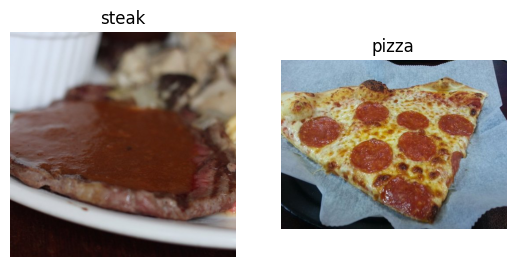

In [23]:
#Visualize the data
plt.figure() #create a plot
plt.subplot(1, 2, 1) #since we are working with binary
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

2. PREPROCESS THE DATA

a. Turn all the data into numbers

b. make sure that the tensors are in the right shape

c. scale the features (normalize/standardize, neural networks prefer normalization: getting the values between 0 and 1)

In [24]:
#preprocess the data
#Define the directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Turn the data into batches:
Batches: Subset of a dataset that a model looks at during training. Instead of looking at 10,000 images at one go a model can look at 32 at a go. Reasons are:
1. 10,000 images might not fit into the memory of the processor. (GPU)
2. Trying to learn the patterns of 10,000 images in one hit can result in the model not being able to learn well.

Why 32
the default value in deep learning libraries.

In [25]:
#create train and test generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.) #when loading the images divide all the pixel values by 255
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
# Load in your image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory of images
                                               target_size=(224, 224), #target size of images (height and width)
                                               class_mode="binary", #type of data that your working with
                                               batch_size=32) #minibatch size to load into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
#Get a sample of a train data batch
images, labels = train_data.next() #getting the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [28]:
#How to get the batch number
len(train_data)

47

In [29]:
1500/32

46.875

In [30]:
#Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [31]:
images[5]

array([[[0.5764706 , 0.427451  , 0.18431373],
        [0.5686275 , 0.41960788, 0.1764706 ],
        [0.5764706 , 0.427451  , 0.18431373],
        ...,
        [0.627451  , 0.40784317, 0.27058825],
        [0.78823537, 0.59607846, 0.427451  ],
        [0.8431373 , 0.67058825, 0.4784314 ]],

       [[0.5882353 , 0.44705886, 0.21176472],
        [0.57254905, 0.43137258, 0.19607845],
        [0.5921569 , 0.45098042, 0.22352943],
        ...,
        [0.54901963, 0.3254902 , 0.21176472],
        [0.6       , 0.3921569 , 0.25882354],
        [0.7137255 , 0.52156866, 0.3647059 ]],

       [[0.58431375, 0.45882356, 0.23529413],
        [0.5647059 , 0.43921572, 0.21568629],
        [0.58431375, 0.44705886, 0.227451  ],
        ...,
        [0.47058827, 0.23137257, 0.14901961],
        [0.4666667 , 0.2392157 , 0.14509805],
        [0.5019608 , 0.28235295, 0.1764706 ]],

       ...,

       [[0.11764707, 0.0627451 , 0.0627451 ],
        [0.11764707, 0.0627451 , 0.0627451 ],
        [0.1137255 , 0

In [32]:
images[5].shape

(224, 224, 3)

3. Create a CNN Model (Start with a Baseline)

Why a baseline?
A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you focus on beating the deadline.

NOTE: In deep learning, there are infinite architectures that can be created. One of the best ways is start with something simple that works on your data and introduce complexity as required. i.e. look at the model that performs best in the field for your problem

In [33]:
#Creating our model will be a bit easier now
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


Breakdown of the Conv2D layer:

**filters**: decides how many filters passes over an input tensor
values can be 10, 32,64,128 (higher values->more complex models)

**Kernel size**: Determines the shape of the filters
values can be (3, 5, 7) lower values learn smaller feature and higher values learn large features.
Neural networks learn by themselves.

**Padding**: pads the target tensor with 0 if (same) to preserve the input shape, or, leaves the target tensor as is..increase the padding value.
if(valid) which lowers the output shape.
Values can be 'same' or 'valid'

**Strides**: number of steps a filter takes across an image at a time e.g. strides=1, filter moves across an image 1 pixel at a time)
Values 1(default)

In [34]:
#The baseline will be a 3 layer convolutional neural network
model_4 = Sequential([
    Conv2D(filters=10, #filter is the number of sliding windows going across an input
           kernel_size=3, #size of the sliding window across the input
           strides=1,#default is 1, size of the step sliding window takes across the input
           padding="valid", #default is valid, output shape gets compressed, if same output shape is same as input
           activation="relu",
           input_shape=(224, 224, 3)), #because its the first layer we ought to define input shape
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")  #output layer(working with binary classification so it only has 1 output neuron)
])

In [35]:
# Compile the model
model_4.compile(loss="binary_crossentropy", #
                optimizer=Adam(),
                metrics=["accuracy"])

In [36]:
#Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


4. Fit the model

In [37]:
#Check the len of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [38]:
#Fit the model
history_4 = model_4.fit(train_data, #this is a combination of the labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 241ms/step - loss: 0.5834 - accuracy: 0.7133 - val_loss: 0.4283 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4356 - accuracy: 0.8187 - val_loss: 0.4166 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 12s 245ms/step - loss: 0.2713 - accuracy: 0.9033 - val_loss: 0.3730 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 13s 284ms/step - loss: 0.1259 - accuracy: 0.9620 - val_loss: 0.4267 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 12s 246ms/step - loss: 0.0377 - accuracy: 0.9940 - val_loss: 0.5087 - val_accuracy: 0.8220


5. Evaluate the Model
Our model is learning something, let us do an evaluation

In [39]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 155ms/step - loss: 0.2856 - accuracy: 0.8980


[0.28564369678497314, 0.8980000019073486]

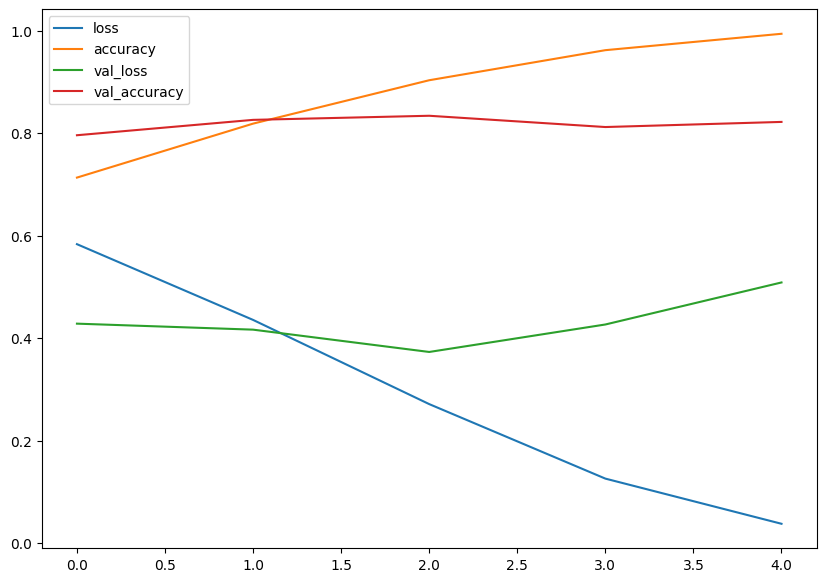

In [40]:
# Plotting the training graphs
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [41]:
#Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #how many epochs did we run for?

  #Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();


NOTE: When the model's validation loss starts to increase, then the model is overfitting the dataset which means that its learning the patterns too well and the model's ability to generalize unseen data is diminished.

Its important to train our models to generalize unseen data.

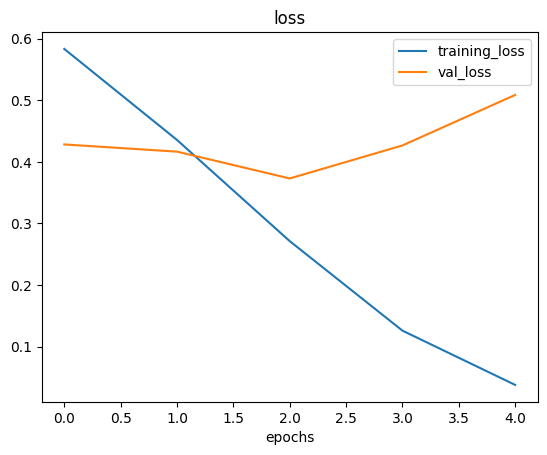

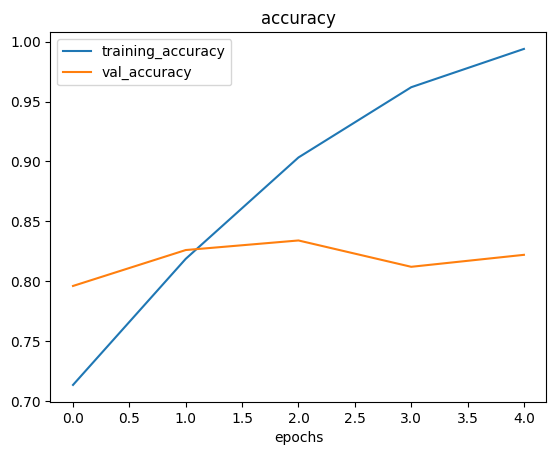

In [42]:
plot_loss_curves(history_4)

6. Adjust the model parameters

Fitting a machine learning model can come in 3 steps:

0. Create the baseline
1. Beat the Baseline by overfitting a largere model
2. Reduce the overfitting

Ways that we can induce overfitting:


*   Increase the number of conv layers
*  Increase the number of conv filters
*   Add another dense layer to the output of our flattened layer

Reduce overfitting/ Regularization

*   Add data augmentation
*   Add regularization layers (such as MaxPool2D)
*   Add more data...












In [43]:
#Create the model (this is the new baseline)
model_5 = Sequential([
   Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
   MaxPool2D(pool_size=2),
   Conv2D(10, 3, activation="relu"),
   MaxPool2D(),
   Conv2D(10, 3, activation="relu"),
   MaxPool2D(),
   Flatten(),
   Dense(1, activation="sigmoid")
])

In [44]:
#Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [45]:
#Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 262ms/step - loss: 0.6111 - accuracy: 0.6613 - val_loss: 0.4703 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 11s 239ms/step - loss: 0.4617 - accuracy: 0.7907 - val_loss: 0.4045 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 11s 236ms/step - loss: 0.4125 - accuracy: 0.8140 - val_loss: 0.3171 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3693 - accuracy: 0.8373 - val_loss: 0.3242 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3532 - accuracy: 0.8513 - val_loss: 0.2922 - val_accuracy: 0.8800


In [46]:
#Get the summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

The lower number of parameters ar of a higher value as compared to the previous models.

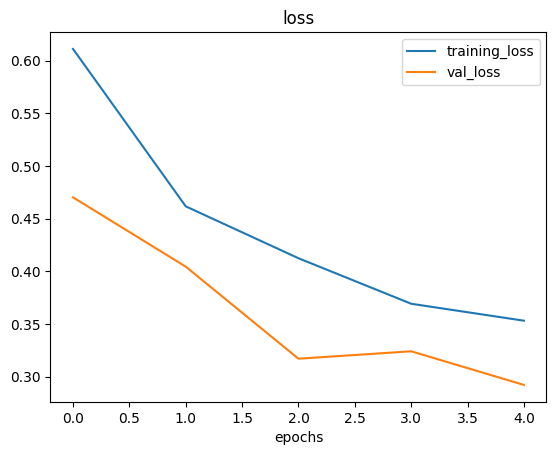

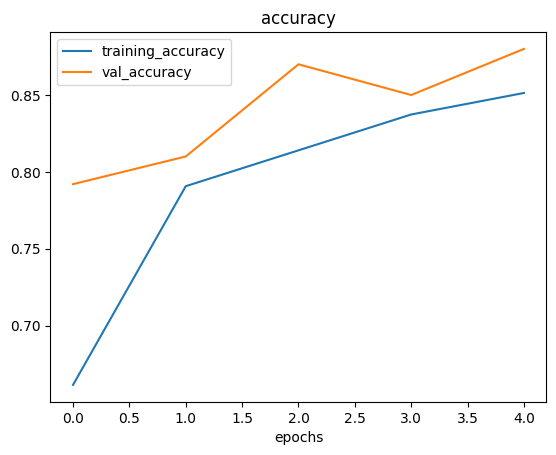

In [47]:
#Plot the loss curves
plot_loss_curves(history_5)

In [48]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


Finding data augmentation and adding


In [66]:
#Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, #how much you want to rotate an image
                                             shear_range=0.2, #how much you want to shear an image
                                             zoom_range=0.2, #zoom in randomly on an image
                                             width_shift_range=0.2, #move your image around on x axis
                                             height_shift_range=0.3, #move your image around on y axis
                                             horizontal_flip=True) #do you want to flip and image

#Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

#Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)


What is Data Augmentation:
D.A is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterns.

Altering might mean adjusting the rotation of the image, flipping it, cropping it or something similar.

In [78]:
#Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)#for demonstration purposes only

#Create non-augmented train data batches
print(" Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
IMG_SIZE = (224, 224)
#create  non-augmented test data batches
print("Non-augmented test datad:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
 Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test datad:
Found 500 images belonging to 2 classes.


Note: D.A is only performed on the training data. Using 'ImageDataGenerator' built in data augmentation parameters, our images are left as they are in the directories but are modified as they are loaded into the model.

Let us visualize some augmented data

In [79]:
#Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()  # Labels are not augmented just the images


showing image number: 30


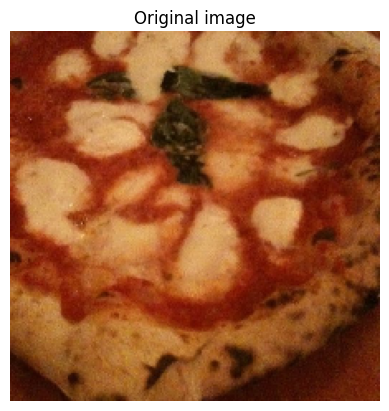

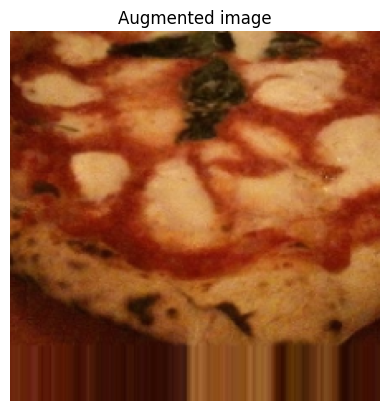

In [80]:
import random
random_number = random.randint(0, 32) #Our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Build a model and see how it learns on augmented data

In [72]:
#Create a model similar to model_5
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

#Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the model
history_6 = model_6.fit(train_data_augmented, #fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 26s 522ms/step - loss: 0.7251 - accuracy: 0.5407 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 26s 551ms/step - loss: 0.7026 - accuracy: 0.5013 - val_loss: 0.6854 - val_accuracy: 0.5100
Epoch 3/5
47/47 [==============================] - 25s 528ms/step - loss: 0.6918 - accuracy: 0.5113 - val_loss: 0.6748 - val_accuracy: 0.7440
Epoch 4/5
47/47 [==============================] - 25s 526ms/step - loss: 0.7187 - accuracy: 0.5473 - val_loss: 0.6669 - val_accuracy: 0.7420
Epoch 5/5
47/47 [==============================] - 25s 529ms/step - loss: 0.6778 - accuracy: 0.6007 - val_loss: 0.6362 - val_accuracy: 0.7600


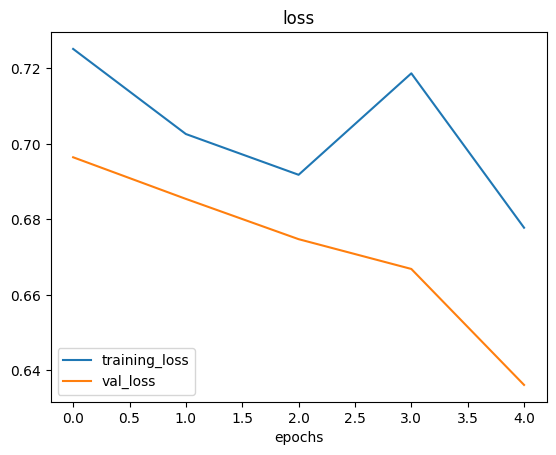

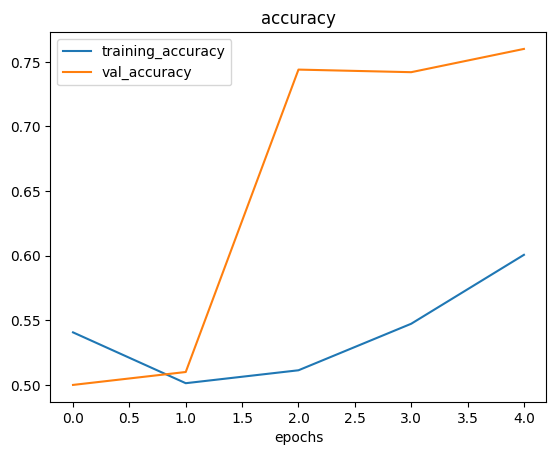

In [73]:
#Check the model training curve
plot_loss_curves(history_6)

Shuffle the augmented training data and train another model same as before and see the performance

In [81]:
#import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode="binary",
                                                                            shuffle=True) #shuffle data this time

Found 1500 images belonging to 2 classes.


In [82]:
#Create a model same as model_5 and model_6
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

#Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the model
history_7 = model_7.fit(train_data_augmented, #fitting model_7 on augmented and shuffled training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 28s 551ms/step - loss: 0.7221 - accuracy: 0.4453 - val_loss: 0.6921 - val_accuracy: 0.5120
Epoch 2/5
47/47 [==============================] - 25s 519ms/step - loss: 0.6925 - accuracy: 0.5373 - val_loss: 0.6844 - val_accuracy: 0.6300
Epoch 3/5
47/47 [==============================] - 29s 610ms/step - loss: 0.6927 - accuracy: 0.5547 - val_loss: 0.6820 - val_accuracy: 0.6680
Epoch 4/5
47/47 [==============================] - 27s 583ms/step - loss: 0.6853 - accuracy: 0.6153 - val_loss: 0.6478 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 25s 528ms/step - loss: 0.6754 - accuracy: 0.5947 - val_loss: 0.6320 - val_accuracy: 0.5580


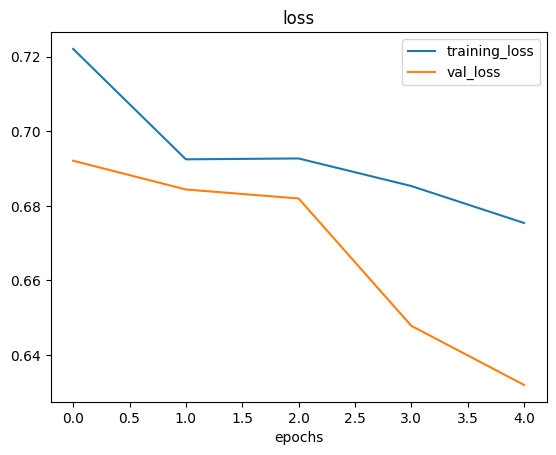

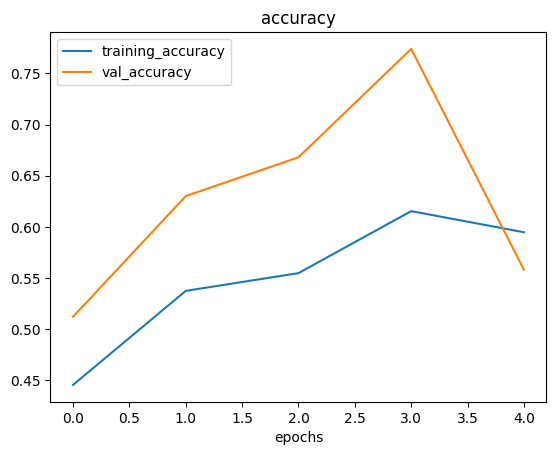

In [83]:
#Check the model training curve
plot_loss_curves(history_7)

When we shuffle the training data, the model gets exposed to all different kinds of data during the training and this enables it to learn new features across a wide array of images (both pizza and steak)